# Case Study: How Does a Bike-Share Navigate Speedy Success?

## Introduction


   This is a capstone project for the Google Data Analytics Professional Certificate. This program, offered by Coursera, serves as preparation for aspiring data analysts to start their career by learning key data analysis skills such as preparing, cleaning, and analyzing data; creating visualizations; and using tools such as SQL, Excel, Tableau, and R.
   
   Suppose we are a junior data analyst working for Cyclistic, a bike-share
company. We are assigned to work with the Cyclistic market analyst team. Our manager believes that to grow the company, we should maximize the number of annual members by converting casual riders into members. The task is
to understand how casual riders and annual members use Cyclistic bikes differently. We want to develop a marketing strategy to convert casual riders into annual members. In order to do this, we need to analyze the Cyclistic historical bike trip data to identify trends. This dataset is offered by the Coursera course.
   
   To answer the business questions, we will follow the steps of the data analysis process: ask, prepare, process, analyze, share, and act.

## About the company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

## Ask

Three questions will guide the future marketing program:

1.
How do annual members and casual riders use Cyclistic bikes differently?

2.
Why would casual riders buy Cyclistic annual memberships?

3.
How can Cyclistic use digital media to influence casual riders to become members?

The problem we are trying to solve is trying to maximize the number of annual members. We will be analyzing trends to learn about how casual riders and annual members use Cyclistic bikes differently. Our analysis will be shared with our manager and Cyclistic marketing analytics team, which will be passed on to the Cyclistic executive team to decide whether to approve the recommended marketing program.

## Prepare

We will use Cyclistic's historical trip data to analyze and identify trends. This dataset has been made available by Motivate International Inc. under this license https://ride.divvybikes.com/data-license-agreement. 

In [5]:
import pandas as pd
import datetime

We'll first read the data we obtained from the website.

In [6]:
december21 = pd.read_csv("202112-divvy-tripdata.csv")

In [7]:
january22 = pd.read_csv("202201-divvy-tripdata.csv")

In [8]:
february22 = pd.read_csv("202202-divvy-tripdata.csv")

In [9]:
march22 = pd.read_csv("202203-divvy-tripdata.csv")

In [10]:
april22 = pd.read_csv("202204-divvy-tripdata.csv")

In [11]:
may22 = pd.read_csv("202205-divvy-tripdata.csv")

In [12]:
june22 = pd.read_csv("202206-divvy-tripdata.csv")

In [13]:
july22 = pd.read_csv("202207-divvy-tripdata.csv")

In [14]:
august22 = pd.read_csv("202208-divvy-tripdata.csv")

In [15]:
september22 = pd.read_csv("202209-divvy-publictripdata.csv")

In [16]:
october22 = pd.read_csv("202210-divvy-tripdata.csv")

In [17]:
november22 = pd.read_csv("202211-divvy-tripdata.csv")

In [18]:
december21.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,46F8167220E4431F,electric_bike,2021-12-07 15:06:07,2021-12-07 15:13:42,Laflin St & Cullerton St,13307,Morgan St & Polk St,TA1307000130,41.854833,-87.663660,41.871969,-87.650965,member
1,73A77762838B32FD,electric_bike,2021-12-11 03:43:29,2021-12-11 04:10:23,LaSalle Dr & Huron St,KP1705001026,Clarendon Ave & Leland Ave,TA1307000119,41.894405,-87.632331,41.967968,-87.650001,casual
2,4CF42452054F59C5,electric_bike,2021-12-15 23:10:28,2021-12-15 23:23:14,Halsted St & North Branch St,KA1504000117,Broadway & Barry Ave,13137,41.899357,-87.648522,41.937582,-87.644098,member
3,3278BA87BF698339,classic_bike,2021-12-26 16:16:10,2021-12-26 16:30:53,Halsted St & North Branch St,KA1504000117,LaSalle Dr & Huron St,KP1705001026,41.899390,-87.648545,41.894877,-87.632326,member
4,6FF54232576A3B73,electric_bike,2021-12-30 11:31:05,2021-12-30 11:51:21,Leavitt St & Chicago Ave,18058,Clark St & Drummond Pl,TA1307000142,41.895579,-87.682024,41.931248,-87.644336,member


We'll start out by combining all the datasets into one big data frame.

In [19]:
bike_data = pd.concat(objs = [december21, january22, february22, march22, april22, may22, june22, july22, august22, september22,
                             october22, november22])

In [20]:
bike_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,46F8167220E4431F,electric_bike,2021-12-07 15:06:07,2021-12-07 15:13:42,Laflin St & Cullerton St,13307,Morgan St & Polk St,TA1307000130,41.854833,-87.663660,41.871969,-87.650965,member
1,73A77762838B32FD,electric_bike,2021-12-11 03:43:29,2021-12-11 04:10:23,LaSalle Dr & Huron St,KP1705001026,Clarendon Ave & Leland Ave,TA1307000119,41.894405,-87.632331,41.967968,-87.650001,casual
2,4CF42452054F59C5,electric_bike,2021-12-15 23:10:28,2021-12-15 23:23:14,Halsted St & North Branch St,KA1504000117,Broadway & Barry Ave,13137,41.899357,-87.648522,41.937582,-87.644098,member
3,3278BA87BF698339,classic_bike,2021-12-26 16:16:10,2021-12-26 16:30:53,Halsted St & North Branch St,KA1504000117,LaSalle Dr & Huron St,KP1705001026,41.899390,-87.648545,41.894877,-87.632326,member
4,6FF54232576A3B73,electric_bike,2021-12-30 11:31:05,2021-12-30 11:51:21,Leavitt St & Chicago Ave,18058,Clark St & Drummond Pl,TA1307000142,41.895579,-87.682024,41.931248,-87.644336,member


The data contains the following columns:

In [21]:
bike_data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

We want to make sure that we combined the data correctly by checking if the combined data set has the correct number of rows.

In [22]:
len(december21) + len(january22) + len(february22) + len(march22) + len(april22) + len(may22) + len(june22) + len(july22) + len(august22) + len(september22) + len(october22) + len(november22)

5733451

In [23]:
len(bike_data)

5733451

In [24]:
rows = len(bike_data)
print(f"Notice that our dataset has {rows} rows.")

Notice that our dataset has 5733451 rows.


The data isn't sorted, so we'll sort by the column "started_at" in ascending order, meaning the time and date in which a trip has started.

In [25]:
bike_data = bike_data.sort_values(by = "started_at")

In [26]:
bike_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
242975,937DC7C2109D635C,electric_bike,2021-12-01 00:00:01,2021-12-01 00:23:16,NaN,NaN,NaN,NaN,41.930000,-87.730000,41.880000,-87.710000,casual
182646,0CD83C3FE35E69A0,classic_bike,2021-12-01 00:00:03,2021-12-01 00:07:34,State St & Kinzie St,13050,St. Clair St & Erie St,13016,41.889187,-87.627754,41.894345,-87.622798,casual
116503,FC2D02B730EBC33D,electric_bike,2021-12-01 00:00:15,2021-12-01 00:02:40,Wells St & Huron St,TA1306000012,NaN,NaN,41.894763,-87.634595,41.900000,-87.640000,member
229332,227558BB46C7DE48,electric_bike,2021-12-01 00:01:00,2021-12-01 00:05:29,NaN,NaN,NaN,NaN,41.790000,-87.600000,41.800000,-87.600000,member
73536,5CB387082B4310B2,classic_bike,2021-12-01 00:03:44,2021-12-01 00:07:44,Ellis Ave & 60th St,KA1503000014,University Ave & 57th St,KA1503000071,41.785097,-87.601073,41.791478,-87.599861,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180458,CB5ECCA9D1567A45,electric_bike,2022-11-30 23:54:40,2022-11-30 23:58:59,State St & Van Buren St,TA1305000035,Michigan Ave & 14th St,TA1307000124,41.877238,-87.627823,41.864059,-87.623727,member
252640,DD58003A0A0C9FE4,electric_bike,2022-11-30 23:54:46,2022-11-30 23:59:23,NaN,NaN,NaN,NaN,41.980000,-87.660000,41.970000,-87.650000,member
177330,0A7F3F32FCC736D1,classic_bike,2022-11-30 23:55:02,2022-12-01 00:21:10,McClurg Ct & Ohio St,TA1306000029,Sheffield Ave & Fullerton Ave,TA1306000016,41.892592,-87.617289,41.925602,-87.653708,member
16514,C32D3E0585F38636,electric_bike,2022-11-30 23:55:28,2022-11-30 23:59:46,Broadway & Cornelia Ave,13278,Clarendon Ave & Gordon Ter,13379,41.945466,-87.646343,41.957867,-87.649505,member


Let's inspect the datatype of each column.

In [27]:
bike_data.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

We need to convert the "started_at" and "ended_at" columns into date and time values.

In [28]:
bike_data[["started_at", "ended_at"]] = bike_data[["started_at", "ended_at"]].astype("datetime64")

In [29]:
bike_data.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [30]:
bike_data.sort_values(by = "started_at")

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
242975,937DC7C2109D635C,electric_bike,2021-12-01 00:00:01,2021-12-01 00:23:16,NaN,NaN,NaN,NaN,41.930000,-87.730000,41.880000,-87.710000,casual
182646,0CD83C3FE35E69A0,classic_bike,2021-12-01 00:00:03,2021-12-01 00:07:34,State St & Kinzie St,13050,St. Clair St & Erie St,13016,41.889187,-87.627754,41.894345,-87.622798,casual
116503,FC2D02B730EBC33D,electric_bike,2021-12-01 00:00:15,2021-12-01 00:02:40,Wells St & Huron St,TA1306000012,NaN,NaN,41.894763,-87.634595,41.900000,-87.640000,member
229332,227558BB46C7DE48,electric_bike,2021-12-01 00:01:00,2021-12-01 00:05:29,NaN,NaN,NaN,NaN,41.790000,-87.600000,41.800000,-87.600000,member
73536,5CB387082B4310B2,classic_bike,2021-12-01 00:03:44,2021-12-01 00:07:44,Ellis Ave & 60th St,KA1503000014,University Ave & 57th St,KA1503000071,41.785097,-87.601073,41.791478,-87.599861,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180458,CB5ECCA9D1567A45,electric_bike,2022-11-30 23:54:40,2022-11-30 23:58:59,State St & Van Buren St,TA1305000035,Michigan Ave & 14th St,TA1307000124,41.877238,-87.627823,41.864059,-87.623727,member
252640,DD58003A0A0C9FE4,electric_bike,2022-11-30 23:54:46,2022-11-30 23:59:23,NaN,NaN,NaN,NaN,41.980000,-87.660000,41.970000,-87.650000,member
177330,0A7F3F32FCC736D1,classic_bike,2022-11-30 23:55:02,2022-12-01 00:21:10,McClurg Ct & Ohio St,TA1306000029,Sheffield Ave & Fullerton Ave,TA1306000016,41.892592,-87.617289,41.925602,-87.653708,member
16514,C32D3E0585F38636,electric_bike,2022-11-30 23:55:28,2022-11-30 23:59:46,Broadway & Cornelia Ave,13278,Clarendon Ave & Gordon Ter,13379,41.945466,-87.646343,41.957867,-87.649505,member


## Process

### Cleaning the data

In the started_at column, we need to check for any NaN values, or incomplete values.

In [31]:
bike_data[bike_data["started_at"].isnull()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


There are no null values.

### Find duplicated data

Now we need to check to see if any rows are duplicates.

In [32]:
bike_data[bike_data["ride_id"].duplicated()].value_counts().count()

0

There are no rows with a duplicate ride id. Now we check for any duplicate rows.

In [33]:
bike_data[bike_data.duplicated()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


There are no duplicate rows.

### Transforming the data

Create a column called "ride_length" which calculates the ride length. To do this, we take the column "ended_at" and subtract it by the column "ended_at". Our first step in creating this column is to convert the "started_at" and "ended_at" columns to a time format so we can perform this calculation.

In [34]:
bike_data['started_at'] = pd.to_datetime(bike_data['started_at'], format="%Y/%m/%d, %H:%M:%S")

In [35]:
bike_data['ended_at'] = pd.to_datetime(bike_data["ended_at"], format = "%Y/%m/%d, %H:%M:%S")

Now, perform the calculation.

In [36]:
bike_data["ended_at"] - bike_data["started_at"]

242975   0 days 00:23:15
182646   0 days 00:07:31
116503   0 days 00:02:25
229332   0 days 00:04:29
73536    0 days 00:04:00
               ...      
180458   0 days 00:04:19
252640   0 days 00:04:37
177330   0 days 00:26:08
16514    0 days 00:04:18
337271   0 days 00:04:41
Length: 5733451, dtype: timedelta64[ns]

This is what we want, so we can now create a new column called "ride_length".

In [37]:
bike_data["ride_length"] = bike_data["ended_at"] - bike_data["started_at"]

Create a column called "day_of_week" to calculate the day of the week that each ride started.

In [38]:
bike_data["ride_length"].sort_values(ascending = True)

417795   -8 days +19:26:39
154251   -1 days +21:11:18
585672   -1 days +21:42:35
126109   -1 days +21:49:58
301277   -1 days +21:50:55
                ...       
626805    23 days 18:08:49
67464     23 days 20:34:04
610068    24 days 21:00:38
590027    25 days 04:17:48
405002    28 days 17:47:15
Name: ride_length, Length: 5733451, dtype: timedelta64[ns]

Convert the "started_at" column to a column which gives the day of the week.

In [39]:
bike_data['started_at'].dt.day_name()

242975    Wednesday
182646    Wednesday
116503    Wednesday
229332    Wednesday
73536     Wednesday
            ...    
180458    Wednesday
252640    Wednesday
177330    Wednesday
16514     Wednesday
337271    Wednesday
Name: started_at, Length: 5733451, dtype: object

Let's name this column "day_of_week".

In [40]:
bike_data["day_of_week"] = bike_data['started_at'].dt.day_name()

Here's the updated data frame.

In [41]:
bike_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
242975,937DC7C2109D635C,electric_bike,2021-12-01 00:00:01,2021-12-01 00:23:16,NaN,NaN,NaN,NaN,41.930000,-87.730000,41.880000,-87.710000,casual,0 days 00:23:15,Wednesday
182646,0CD83C3FE35E69A0,classic_bike,2021-12-01 00:00:03,2021-12-01 00:07:34,State St & Kinzie St,13050,St. Clair St & Erie St,13016,41.889187,-87.627754,41.894345,-87.622798,casual,0 days 00:07:31,Wednesday
116503,FC2D02B730EBC33D,electric_bike,2021-12-01 00:00:15,2021-12-01 00:02:40,Wells St & Huron St,TA1306000012,NaN,NaN,41.894763,-87.634595,41.900000,-87.640000,member,0 days 00:02:25,Wednesday
229332,227558BB46C7DE48,electric_bike,2021-12-01 00:01:00,2021-12-01 00:05:29,NaN,NaN,NaN,NaN,41.790000,-87.600000,41.800000,-87.600000,member,0 days 00:04:29,Wednesday
73536,5CB387082B4310B2,classic_bike,2021-12-01 00:03:44,2021-12-01 00:07:44,Ellis Ave & 60th St,KA1503000014,University Ave & 57th St,KA1503000071,41.785097,-87.601073,41.791478,-87.599861,member,0 days 00:04:00,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180458,CB5ECCA9D1567A45,electric_bike,2022-11-30 23:54:40,2022-11-30 23:58:59,State St & Van Buren St,TA1305000035,Michigan Ave & 14th St,TA1307000124,41.877238,-87.627823,41.864059,-87.623727,member,0 days 00:04:19,Wednesday
252640,DD58003A0A0C9FE4,electric_bike,2022-11-30 23:54:46,2022-11-30 23:59:23,NaN,NaN,NaN,NaN,41.980000,-87.660000,41.970000,-87.650000,member,0 days 00:04:37,Wednesday
177330,0A7F3F32FCC736D1,classic_bike,2022-11-30 23:55:02,2022-12-01 00:21:10,McClurg Ct & Ohio St,TA1306000029,Sheffield Ave & Fullerton Ave,TA1306000016,41.892592,-87.617289,41.925602,-87.653708,member,0 days 00:26:08,Wednesday
16514,C32D3E0585F38636,electric_bike,2022-11-30 23:55:28,2022-11-30 23:59:46,Broadway & Cornelia Ave,13278,Clarendon Ave & Gordon Ter,13379,41.945466,-87.646343,41.957867,-87.649505,member,0 days 00:04:18,Wednesday


Now let's clean the data more. We need to remove any rows in which the ride length is less than or equal to zero seconds because a ride length less than zero does not make any sense in this context, and a ride length of zero seconds can't happen. The following command let's us drop these rows.

In [48]:
bike_data = bike_data.drop(bike_data[~(bike_data["ride_length"] > "0 days")].index)

In [49]:
bike_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
242975,937DC7C2109D635C,electric_bike,2021-12-01 00:00:01,2021-12-01 00:23:16,NaN,NaN,NaN,NaN,41.930000,-87.730000,41.880000,-87.710000,casual,0 days 00:23:15,Wednesday
182646,0CD83C3FE35E69A0,classic_bike,2021-12-01 00:00:03,2021-12-01 00:07:34,State St & Kinzie St,13050,St. Clair St & Erie St,13016,41.889187,-87.627754,41.894345,-87.622798,casual,0 days 00:07:31,Wednesday
116503,FC2D02B730EBC33D,electric_bike,2021-12-01 00:00:15,2021-12-01 00:02:40,Wells St & Huron St,TA1306000012,NaN,NaN,41.894763,-87.634595,41.900000,-87.640000,member,0 days 00:02:25,Wednesday
229332,227558BB46C7DE48,electric_bike,2021-12-01 00:01:00,2021-12-01 00:05:29,NaN,NaN,NaN,NaN,41.790000,-87.600000,41.800000,-87.600000,member,0 days 00:04:29,Wednesday
73536,5CB387082B4310B2,classic_bike,2021-12-01 00:03:44,2021-12-01 00:07:44,Ellis Ave & 60th St,KA1503000014,University Ave & 57th St,KA1503000071,41.785097,-87.601073,41.791478,-87.599861,member,0 days 00:04:00,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180458,CB5ECCA9D1567A45,electric_bike,2022-11-30 23:54:40,2022-11-30 23:58:59,State St & Van Buren St,TA1305000035,Michigan Ave & 14th St,TA1307000124,41.877238,-87.627823,41.864059,-87.623727,member,0 days 00:04:19,Wednesday
252640,DD58003A0A0C9FE4,electric_bike,2022-11-30 23:54:46,2022-11-30 23:59:23,NaN,NaN,NaN,NaN,41.980000,-87.660000,41.970000,-87.650000,member,0 days 00:04:37,Wednesday
177330,0A7F3F32FCC736D1,classic_bike,2022-11-30 23:55:02,2022-12-01 00:21:10,McClurg Ct & Ohio St,TA1306000029,Sheffield Ave & Fullerton Ave,TA1306000016,41.892592,-87.617289,41.925602,-87.653708,member,0 days 00:26:08,Wednesday
16514,C32D3E0585F38636,electric_bike,2022-11-30 23:55:28,2022-11-30 23:59:46,Broadway & Cornelia Ave,13278,Clarendon Ave & Gordon Ter,13379,41.945466,-87.646343,41.957867,-87.649505,member,0 days 00:04:18,Wednesday


In [50]:
bike_data.day_of_week.value_counts()

Saturday     921356
Thursday     853429
Friday       816810
Wednesday    816518
Tuesday      782121
Sunday       782045
Monday       756824
Name: day_of_week, dtype: int64

Our cleaned data set contains 5,729,103 rows.

## Analyze

Export the data set into a CSV file, so that we can analyze it using SQL.

In [51]:
bike_data.to_csv('bike_data.csv')

My SQL code along with its outputs can be found [here](https://github.com/AaronChao4/Cyclistic-Bike-share-Analysis/blob/main/SQL_Code_Output.pdf).

To summarize our findings, we found that the average ride length is 19.43 minutes. Casual riders have an average ride length of 29.12 minutes while annual riders have an average ride length of 12.71 minutes. It seems that casual riders ride significantly longer than annual riders. Furthermore, the average ride lengths are the longest on weekends: 23.66 minutes on Saturday and 24.09 minutes on Sunday. The average ride length is the lowest on Wednesdays in which it is 16.39 minutes. The most number of rides occur on Saturday and the lowest number of rides happens on Mondays. The total number of rides from Saturdays is 921,356 rides and for Mondays is 756,824.

## Share

To learn more about our data and present it in an aesthetically pleasing way, we need to create visualizations. I used PowerBI to accomplish this task and my visualizations can be found [here](https://github.com/AaronChao4/Cyclistic-Bike-share-Analysis/blob/main/Visualization.pdf).

## Act

We'll take a look at the visualizations to learn more about our data and find any trends. Note that the blue lines/bars depict the annual members while the red lines/bars depict the casual riders.

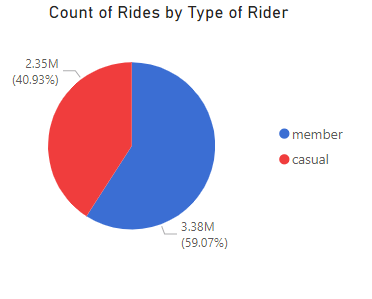

In [5]:
from IPython.display import Image
Image(filename="Graph2.png", width = 400)

We can see that 59.07% (3.38 million) of the riders have the annual membership, however, only 40.93% (2.35 million) of the riders are casual riders. This is important because there are still a lot of riders that we want to convert to annual memberships.

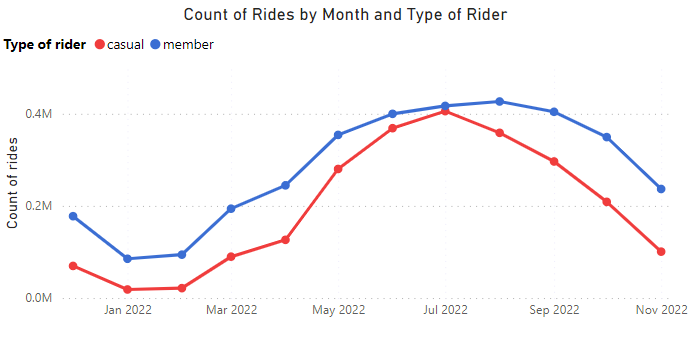

In [1]:
from IPython.display import Image
Image(filename="Graph1.png", width = 800)

The graph above shows the monthly count of rides for casual riders and members. The trends are similar for both type of riders; the count of rides start to increase during the spring and it peaks in the summer. After the summer, the count of rides drop. The count of rides is the lowest during the winter months, specifically during January and February. This makes sense because riders are more likely to prefer using bikes as opposed to walking when it is hot outside. We can also see that members ride more than casual riders.

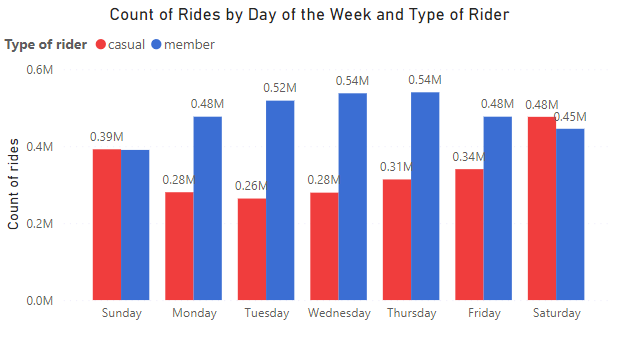

In [2]:
from IPython.display import Image
Image(filename="Graph3.png", width = 600)

This bar chart above shows the weekly count of rides for casual riders versus members. We see that members use the bikes more often during the weekday than weekends. The count of rides for members are the highest on Wednesday and Thursdays with 0.54 million rides. For casual riders, the count of rides is highest on weekends where there are 0.48 million rides on Saturday and 0.39 million on Sunday. The bar chart below shows the weekly count rides for all riders. The count of rides is highest on Saturday with 0.92 million total rides and the lowest count of rides is on Monday with 0.76 million total rides.

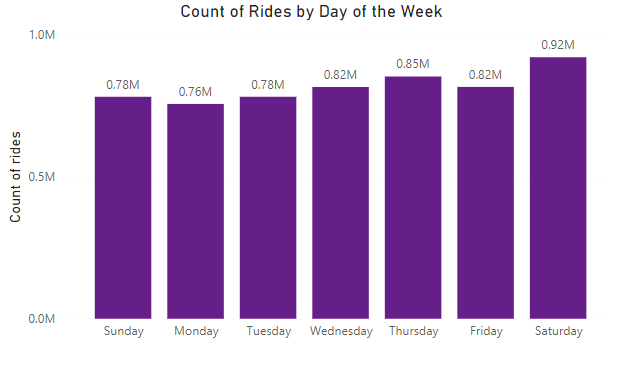

In [1]:
from IPython.display import Image
Image(filename="Graph4.png", width = 600)

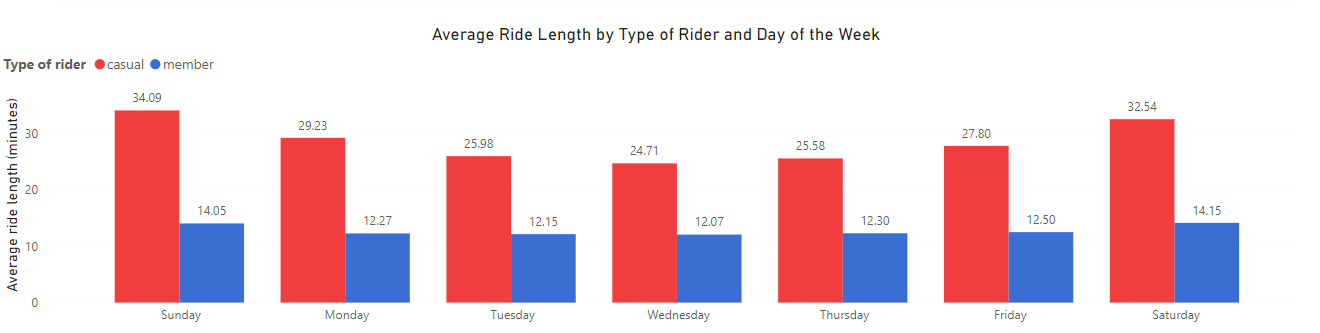

In [6]:
from IPython.display import Image
Image(filename="Graph5.png", width = 1000)

The above bar graph shows the weekly average ride length for both casual riders and members. The average ride length for casual riders are approximately double the length as members. The trends for both casual riders and members are similar; the average ride length is high on weekends compared to weekdays. For casual riders, the longest average ride length happens on Sunday in which it is 34.09 minutes, while the longest average ride length for members is on Saturday in which it is 14.15 minutes. The day with the lowest average ride length is on Wednesday and this is the case for both type of riders. The bar graph below depicts the weekly average ride length for all members. It is not surprising that the ride length is highest on weekends. The average ride length decreases by 5.54 from Sunday to Monday, and the trend is the average ride length decreases until Wednesday, where it then increases until Sunday.

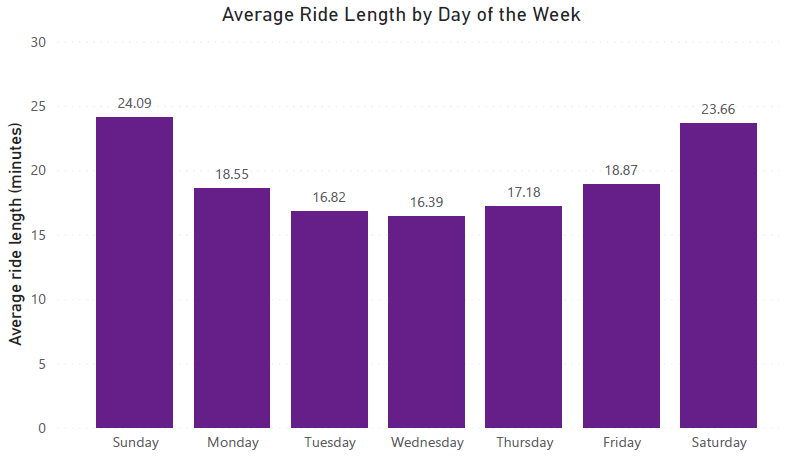

In [4]:
from IPython.display import Image
Image(filename="Graph7.png", width = 700)

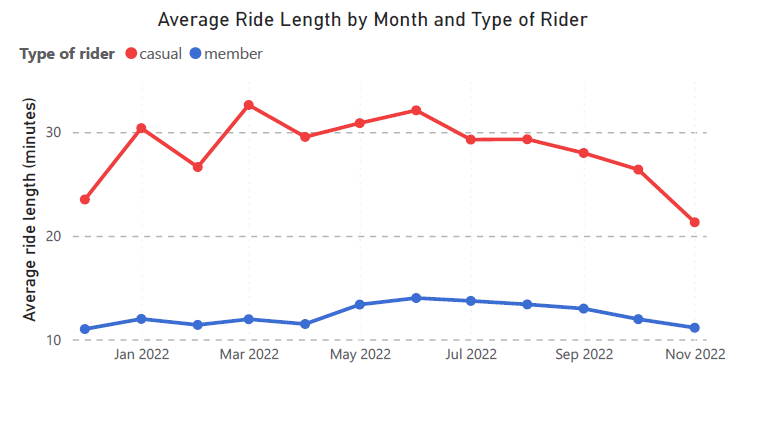

In [5]:
from IPython.display import Image
Image(filename="Graph6.png", width = 800)

The above line chart shows the monthly ride length for casual riders and members. The average ride length for casual riders is much higher than members. The average ride length for members doesn't change much throughout the year. There is a slight increase in ride length of 1.88 minutes from April 2022 to May 2022. After May 2022, the ride length peaks at June 2022, and it continues to slightly decrease.
For casual riders, the average ride length is 23.50 minutes on December 2022 and increases to 30.39 minutes on January 2022. The ride length decreases in February but increases and peaks in March 2022 at 32.63 minutes. After March 2022, the ride length decreases to 29.54 minutes in April 2022 but increases to 32.11 minutes in June 2022. After June 2022, the average ride length drops and continues to decrease into the colder months.

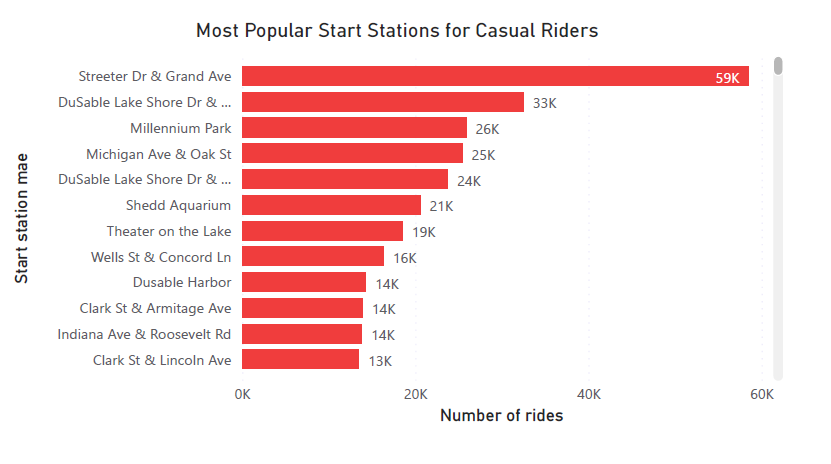

In [34]:
from IPython.display import Image
Image(filename="Graph8.png", width = 600)

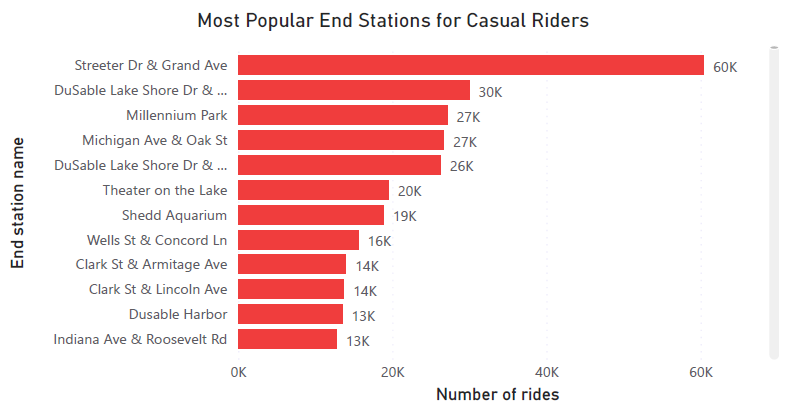

In [35]:
from IPython.display import Image
Image(filename="Graph9.png", width = 600)

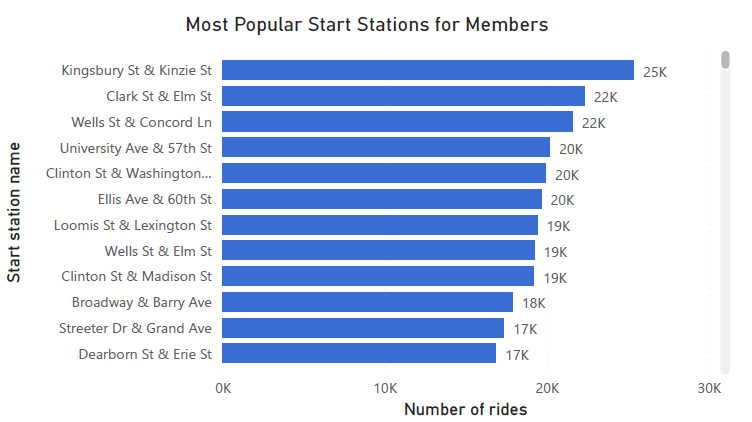

In [36]:
from IPython.display import Image
Image(filename="Graph10.png", width = 600)

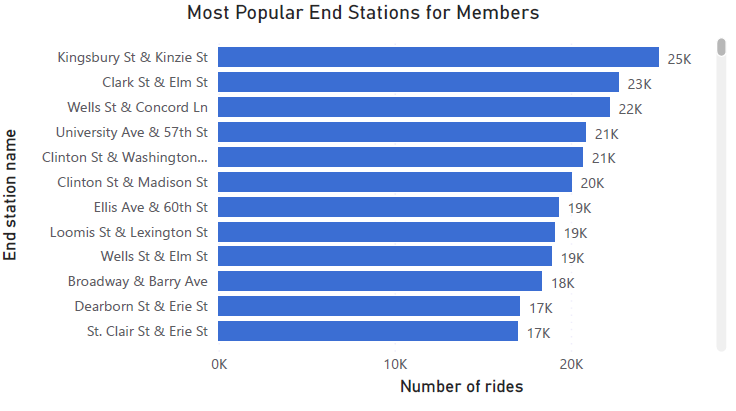

In [39]:
from IPython.display import Image
Image(filename="Graph11.png", width = 600)

The charts above show the most popular stations for casual riders and members. We see that for casual riders, the most popular stations in which their ride starts is at Streeter Dr & Grand Avenue which accounted for about 58,544 rides. This is significantly higher than the other popular start stations for casual riders, with the second most popular station being DuSable Lake Shore Dr & Monroe St with a ride count of 32,511. For members, the most popular start stations occur at Kingsbury St & Kinzie St in which it accounts for 25,377 rides.

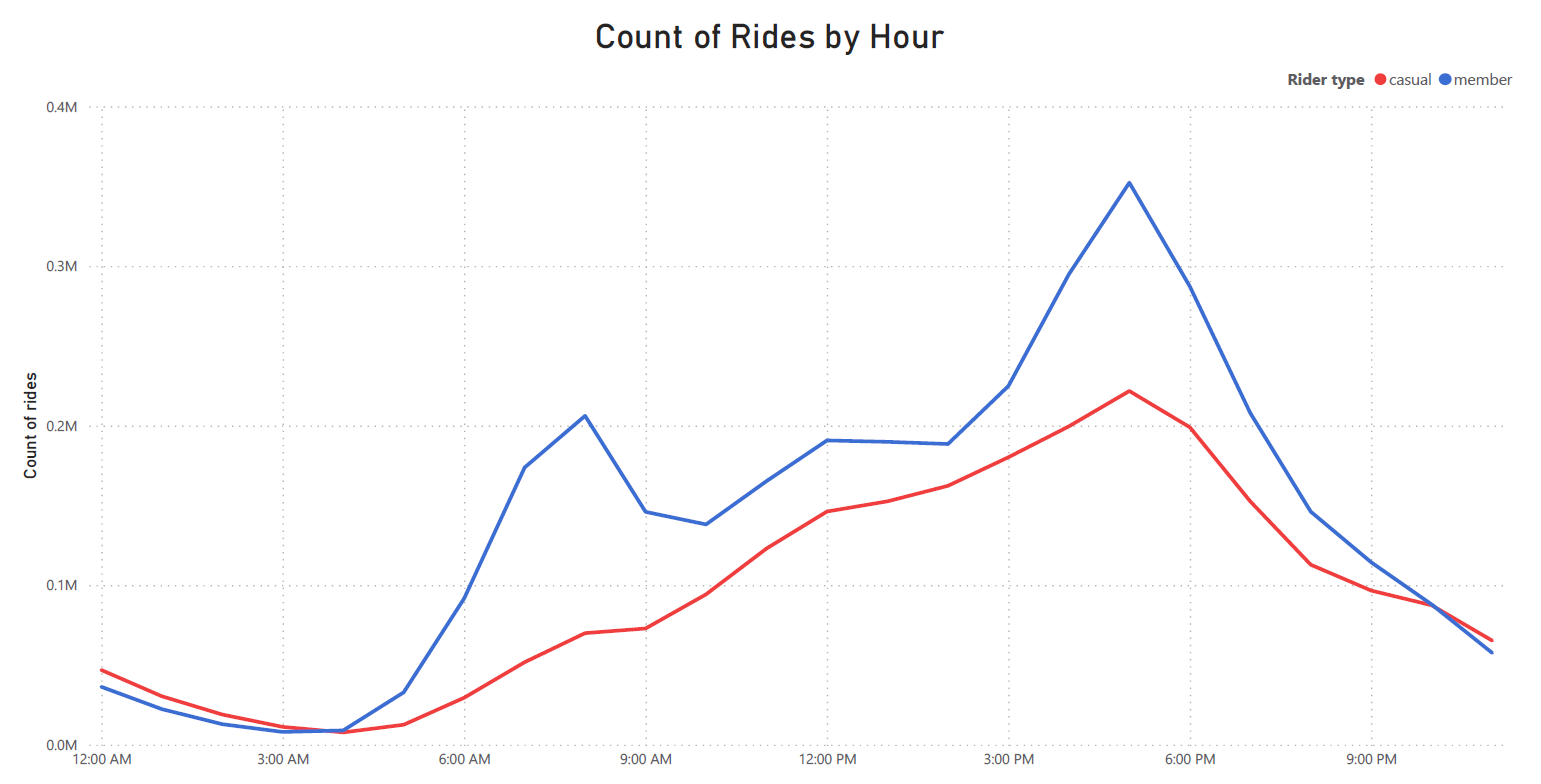

In [38]:
from IPython.display import Image
Image(filename="Graph12.png", width = 1000)

The graph above shows us the hourly count of rides for both rider types. For members, the amount of rides peaks at 8 AM and has another peak at 5 PM. The trend for casual riders is a little different; the count of rides start to increase at 4 AM and continues to slowly increase until its peak hour at 5 PM. Both these trends make sense because the ride counts correspond to the start and end of the work day.

## Conclusion and Recommendations

Now that we've gain some insight into our findings, we need to guide our team by creating a marketing strategy to maximize the amount of riders that purchase annual memberships.

### 1. Offer casual riders a special discount for purchasing membership before the summer months. Let customers choose the place their membership on hold.

The count of rides peaks during the summer months so offering a special promotion for the membership will encourage riders to purchase the membership. It would be a good time to offer this promotion in April because the count of rides for casual riders shows a huge increase after April. During the winter months, not many riders use the bikes so let memberships place their account on freeze so they don't unsubscribe.

### 2. By showing data, inform casual riders about how much money they can save if they convert to an annual membership plan. 

The average ride times for casual riders are a lot higher compared to the average ride times for members. We should account for this fact in our advertisements and demonstrate how much money riders can save by purchasing an annual membership.

### 3. Partner with businesses, retailers, restaurants, or hold special events near the popular start/end stations.

Most Cyclistic bike rides start and end at the station located on Streeter Dr. & Grand Avenue. This area has heavy traffic so it partnering with businesses near this location can help boost sales for memberships since casual riders will likely visit these businesses and see the campaigns or advertisements.